En primer lugar, para este ejercicio se importarán las librerías necesarias:
* os: Para el acceso a las rutas del sistema
* numpy: Para el uso de los arrays de numpy y otras operaciones matemáticas
* matplotlib: Para hacer representaciones gráficas de las imágenes
* skiimage: Para leer las imagenes correctamente y para calcular posteriormente la entropia mediante esta librería.

In [100]:
import os
from skimage import color, io, img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

## Cálculo de la entropía (Manual)

En primer lugar, se realiza una lectura de la imagen en formato ubyte, el cual permite tener la imagen en blanco y negro con un canal de 0-255 (8bytes)

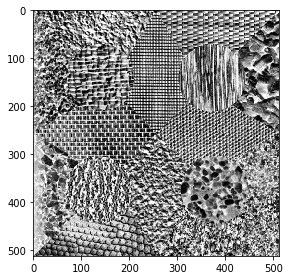

In [103]:
image = img_as_ubyte(color.rgb2gray(io.imread(os.getcwd() + "/data/tema5_actividad.png")))
io.imshow(image)

A continuación se realizará el cálculo manual de la entropía mediante el uso de funciones.  
La entropía se define como:

In [36]:
display(Math(r' H = -\sum(p * \log(p))'))

<IPython.core.display.Math object>

Para poder aplicar esta función a una imagen, es necesario generar un **histograma normalizado** que se usará como parámetro **p** .  
* Se utiliza la función *histogram* de numpy que devuelve el número de ocurrencias para cada valor del histograma.  
* Con esta información, se normaliza los datos y se aplica la fórmula del cálculo de la entropía.

In [37]:
def image_entropy(img):
    """
        Calculo de la entropía para una imagen mediante el uso de un
        histograma normalizado para el calculo de las p.
        results: Float con la entropia
    """
    import math
    histogram, bin_edges = np.histogram(img)
    histogram_length = sum(histogram)
 
    samples_probability = [float(h) / histogram_length for h in histogram]
 
    return -sum([p * math.log(p) for p in samples_probability if p != 0])

Tras esto, es necesario permitir el uso de mascaras para poder calcular la entropía para un conjunto de pixeles determinado (3x3, 5x5, 7x7,...).  
  
Para ello, se crea una función que reciba una imagen y una k, la cual contendrá el número de pixeles de la máscara.  
Con ello, se itera sobre la imagen, para mover la mascara a lo largo de ella y hacer un cálculo de la entropía, la cual se va almacenando en un array.
  
El objetivo es tener calculadas las distintas entropías para cada posiciones de la máscara y luego poder mostrarlo y ver como el algoritmo es capaz de detectar las distintas texturas.

In [39]:
def image_entropy_results(img, k):
    """
        Calculo de una matriz con las distintas entropías resultantes a
        partir de una imagen y una máscara asociada.
        results: matriz con las entropías por cada máscara.
    """
    results = np.empty([len(img), len(img[0])])
    for i in range(len(img)):
        for j in range(len(img[0])):
            sample = img[i:i+k, j:j+k]
            entropy = image_entropy(sample)
            results[i,j]=entropy
    return results

Por último, se calcula la entropía de la imagen utilizando la función anterior para las máscaras: 3x3, 5x5 y 7x7

In [47]:
data3 = image_entropy_results(image, 3)
data5 = image_entropy_results(image, 5)
data7 = image_entropy_results(image, 7)

Al disponer ahora de matrices n x n (siendo n el tamaño de la imagen original) con la entropía calculada para cada máscara de cada pixel, se puede mostrar mediante *matplotlib* para observar si ha sido posible detectar texturas para cada una de estas ejecuciones.  
  
Para mostrarlo, se genera una figura con dos columnas y dos filas, mostrando en la primera posición la imagen original y en las restantes las calculadas con las distintas máscaras

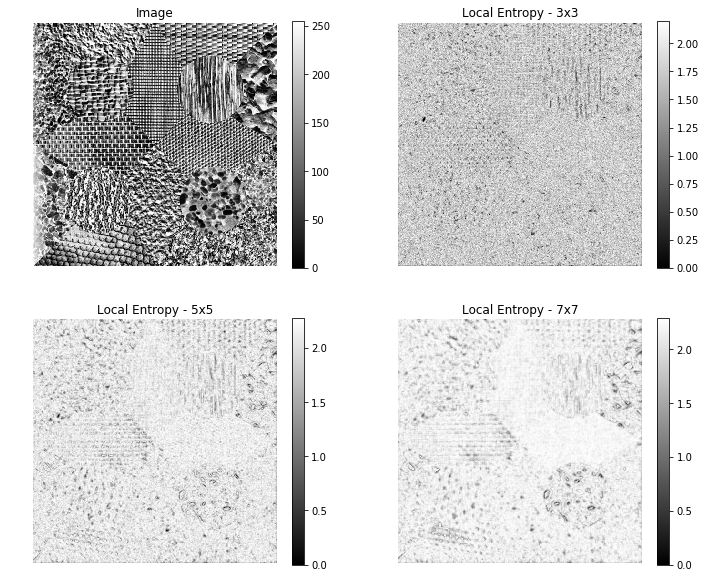

In [136]:
# Se crea la figura y los distintos ejes mediante el uso de subplots
fig, ((ax00, ax01),(ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 10),
                               sharex=True, sharey=True)

# El primer subplot se inicializa con una imagen a partir de la imagen original
img0 = ax00.imshow(image, cmap=plt.cm.gray)
ax00.set_title("Image")
ax00.axis("off")
fig.colorbar(img0, ax=ax00)

# El segundo subplot se inicializa con las entropías de la mascara 3x3
img1 = ax01.imshow(data3, cmap='gray')
ax01.set_title("Local Entropy - 3x3")
ax01.axis("off")
fig.colorbar(img1, ax=ax01)

# El tercer subplot se inicializa con las entropías de la mascara 5x5
img2 = ax10.imshow(data5, cmap='gray')
ax10.set_title("Local Entropy - 5x5")
ax10.axis("off")
fig.colorbar(img2, ax=ax10)

# El segundo subplot se inicializa con las entropías de la mascara 7x7
img3 = ax11.imshow(data7, cmap='gray')
ax11.set_title("Local Entropy - 7x7")
ax11.axis("off")
fig.colorbar(img3, ax=ax11)

plt.show()

Como se puede observar en las imágenes tras aplicar el cálculo de las entropías, es posible identificar regiones mediante los valores obtenidos.  
  
A continuación, se muestra la obtención de algunas de las figuras con sus distintas texturas. Para ello, se incrementa la textura que se quiere localizar mediante valores máximos:  
* En la primera imagen muestra la imagen original
* En la segunda imagen se trata de localizar la textura de la pelota superior derecha
* En la tercera imagen se trata de localizar la textura de la pelota inferior izquierda
* En la cuarta imagen se trata de localizar la textura de que se encuetra en el medio de la imagen a la izquierda con forma de ladrillos

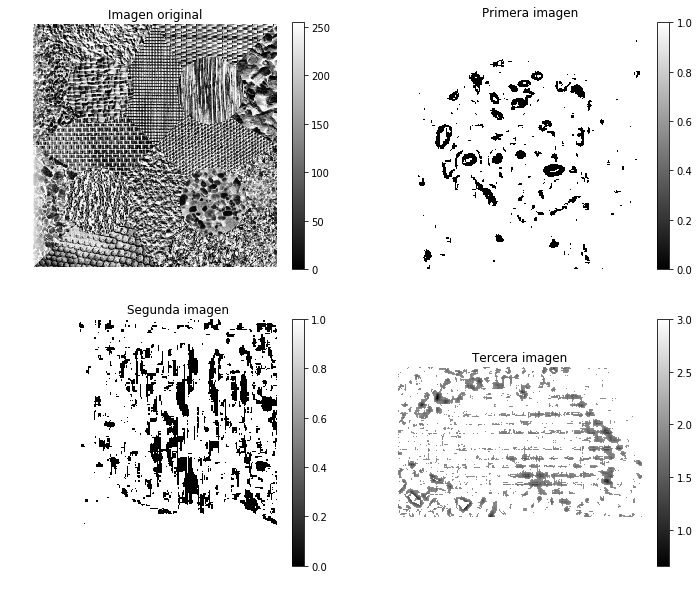

In [141]:
ball = np.where(data7[270:480, 290:480]<1.8, 0,1)
ball2 = np.where(data7[50:250, 290:450]>2, 1,0)
net = np.where(data7[170:330, 10:270]>2, 3, data7[170:330, 10:270])

# Se crea la figura y los distintos ejes mediante el uso de subplots
fig, ((ax00, ax01),(ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 10),
                               sharex=False, sharey=False)

# El primer subplot se inicializa con una imagen a partir de la imagen original
img0 = ax00.imshow(image, cmap=plt.cm.gray)
ax00.set_title("Imagen original")
ax00.axis("off")
fig.colorbar(img0, ax=ax00)

# El segundo subplot se inicializa con las entropías de la mascara 3x3
img1 = ax01.imshow(ball, cmap='gray')
ax01.set_title("Primera imagen")
ax01.axis("off")
fig.colorbar(img1, ax=ax01)

# El tercer subplot se inicializa con las entropías de la mascara 5x5
img2 = ax10.imshow(ball2, cmap='gray')
ax10.set_title("Segunda imagen")
ax10.axis("off")
fig.colorbar(img2, ax=ax10)

# El segundo subplot se inicializa con las entropías de la mascara 7x7
img3 = ax11.imshow(net, cmap='gray')
ax11.set_title("Tercera imagen")
ax11.axis("off")
fig.colorbar(img3, ax=ax11)

plt.show()

## Cálculo de la entropía (scikit - image)

Scikit-Image proveé de su propio algoritmo para el cálculo de la entropía en imagenes.  
  
El objetivo es utilizarlo para poder evaluar el cálculo hecho de manera manual con el que trae el framework de sckit:
* Para ello, se usa el método *entropy*
* Además, se puede definir una máscara mediante el uso de la función *disk*  
  
Se muestran los resultados mediante plots

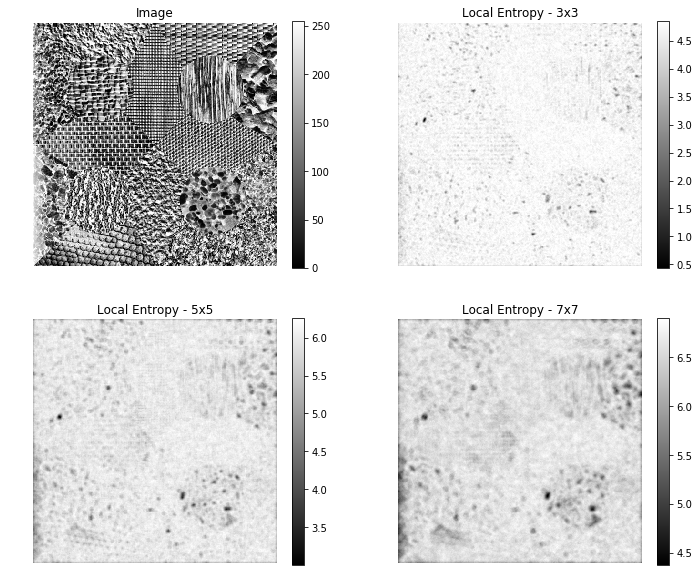

In [23]:
fig, ((ax00, ax01),(ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 10),
                               sharex=True, sharey=True)

img0 = ax00.imshow(image, cmap=plt.cm.gray)
ax00.set_title("Image")
ax00.axis("off")
fig.colorbar(img0, ax=ax00)

img1 = ax01.imshow(entropy(image, disk(3)), cmap='gray')
ax01.set_title("Local Entropy - 3x3")
ax01.axis("off")
fig.colorbar(img1, ax=ax01)

img2 = ax10.imshow(entropy(image, disk(5)), cmap='gray')
ax10.set_title("Local Entropy - 5x5")
ax10.axis("off")
fig.colorbar(img2, ax=ax10)

img3 = ax11.imshow(entropy(image, disk(7)), cmap='gray')
ax11.set_title("Local Entropy - 7x7")
ax11.axis("off")
fig.colorbar(img3, ax=ax11)

plt.show()